**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**


# Linear Discriminant Analysis (LDA) Process

Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used primarily for classification. It aims to reduce the dimensionality of data while maintaining class separability.

## Objective

The primary goals of LDA are:

- Maximize the distance between the class means (inter-class variance).
- Minimize the variance within each class (intra-class variance).

The objective is to transform the data such that the classes are better separated in the lower-dimensional space.

## Step-by-Step Process

### 1. Prepare the Data

- Collect the dataset with \( n \) samples, each having \( d \) features. Each sample belongs to one of \( k \) classes.
- Represent the dataset as a matrix \( X \), where each row is a feature vector:

$$
X = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

### 2. Calculate the Mean Vectors

For each class \( C_i \), calculate the mean of each feature. Let \( \mu_i \) be the mean of class \( C_i \):

$$
\mu_i = \frac{1}{n_i} \sum_{x_j \in C_i} x_j
$$

Where:

- \( n_i \) is the number of samples in class \( C_i \).
- \( x_j \) represents the feature vectors in class \( C_i \).

### 3. Calculate the Scatter Matrices

#### Between-Class Scatter Matrix (\( S_B \))

The goal is to measure how far the class means are from the overall mean. The between-class scatter matrix is computed as:

$$
S_B = \sum_{i=1}^k n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

Where:

- \( n_i \) is the number of samples in class \( C_i \).
- \( \mu_i \) is the mean of class \( C_i \).
- \( \mu \) is the overall mean of the entire dataset.

#### Within-Class Scatter Matrix (\( S_W \))

The within-class scatter matrix measures the spread of data points within each class:

$$
S_W = \sum_{i=1}^k \sum_{x_j \in C_i} (x_j - \mu_i)(x_j - \mu_i)^T
$$

Where:

- \( x_j \) is a sample in class \( C_i \).
- \( \mu_i \) is the mean of class \( C_i \).

### 4. Compute the Eigenvectors and Eigenvalues

The goal is to solve the generalized eigenvalue problem:

$$
S_W^{-1} S_B v = \lambda v
$$

Where:

- \( S_W^{-1} S_B \) is the matrix product of the inverse of the within-class scatter matrix and the between-class scatter matrix.
- \( v \) are the eigenvectors, and \( \lambda \) are the corresponding eigenvalues.

### 5. Sort the Eigenvectors

Once you have the eigenvectors and eigenvalues, sort them in descending order of the eigenvalues. Select the top \( m \) eigenvectors corresponding to the largest eigenvalues to form the transformation matrix.

### 6. Project the Data

To reduce the dimensionality, project the original dataset onto the space defined by the top \( m \) eigenvectors (where \( m \) is less than the original number of dimensions):

$$
X' = X W
$$

Where:

- \( X' \) is the transformed data.
- \( W \) is the matrix of the top \( m \) eigenvectors.

### 7. Classify the Data

After dimensionality reduction, the transformed data can be classified using any classifier, such as Logistic Regression, KNN, or a Decision Tree.

## Advantages of LDA

- LDA is computationally efficient and easy to interpret.
- It works well when the class distributions are Gaussian and the covariance within each class is similar.
- It can reduce the dimensionality of the data while preserving class separability.

## Applications of LDA

- **Facial recognition**: Reducing the dimensionality of facial features to improve classification performance.
- **Medical diagnosis**: Classifying patients based on continuous medical measurements, such as blood pressure, cholesterol levels, etc.
- **Pattern recognition**: Identifying patterns in data, such as distinguishing between different types of objects.


In [1]:
# Step 1: Load Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# Step 2: Load Dataset
data = load_iris()
X = data.data
y = data.target
labels = data.target_names

In [3]:

# Step 3: Preprocess Data
# We will use all 150 samples
X = X[:, :2]  # Select only the first two features for easy visualization and data separation
y = y

In [4]:

# Step 4: Compute the Mean of Each Class
classes = np.unique(y)
mean_vectors = []
for cl in classes:
    mean_vectors.append(np.mean(X[y == cl], axis=0))

In [5]:
# Step 5: Compute the Scatter Matrices
# Compute the Within-class scatter matrix (S_W)
S_W = np.zeros((X.shape[1], X.shape[1]))
for cl, mv in zip(classes, mean_vectors):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == cl]:
        row = row.reshape(X.shape[1], 1)
        mv = mv.reshape(X.shape[1], 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

In [6]:
# Compute the Between-class scatter matrix (S_B)
mean_overall = np.mean(X, axis=0)
S_B = np.zeros((X.shape[1], X.shape[1]))
for cl, mv in zip(classes, mean_vectors):
    mv = mv.reshape(X.shape[1], 1)
    mean_overall = mean_overall.reshape(X.shape[1], 1)
    n = X[y == cl].shape[0]
    S_B += n * (mv - mean_overall).dot((mv - mean_overall).T)

In [7]:
# Step 6: Compute Eigenvalues and Eigenvectors
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))


In [8]:
# Sort the eigenvalues and eigenvectors in descending order
eigvecs = eigvecs[:, np.argsort(eigvals)[::-1]]
eigvals = eigvals[np.argsort(eigvals)[::-1]]

In [9]:

# Step 7: Project Data onto New Space means new vector
# We will take the first eigenvector and project the data
X_lda = X.dot(eigvecs[:, 0].reshape(X.shape[1], 1))

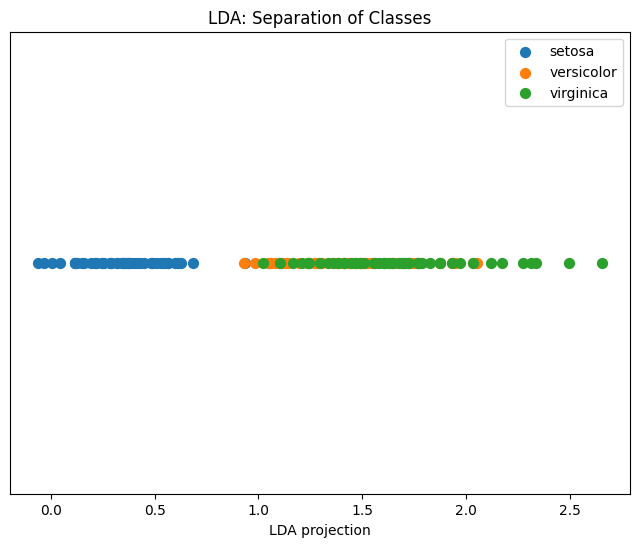

In [10]:
# Step 8: Visualize the Result
plt.figure(figsize=(8,6))
for cl, label in zip(classes, labels):
    plt.scatter(X_lda[y == cl], np.zeros_like(X_lda[y == cl]), label=label, s=50)
plt.title('LDA: Separation of Classes')
plt.xlabel('LDA projection')
plt.yticks([])
plt.legend()
plt.show()

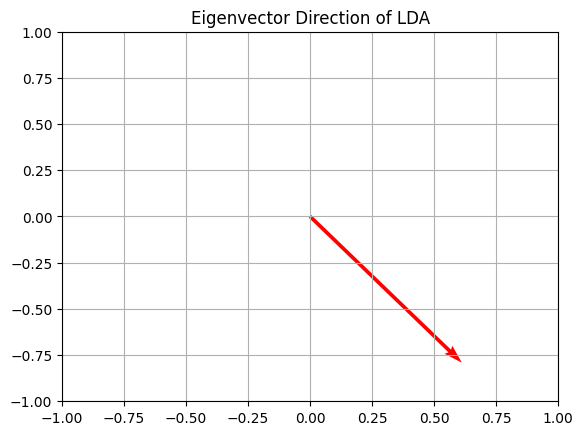

In [11]:
# Step 9: Visualize Eigenvector Direction
plt.quiver(0, 0, eigvecs[0, 0], eigvecs[1, 0], angles='xy', scale_units='xy', scale=1, color="r")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('Eigenvector Direction of LDA')
plt.grid(True)
plt.show()

  Classifier: If you want to make predictions (like classifying unseen data points), you can apply a classifier on top of the LDA-transformed data, but just performing LDA for separation (without further classification) is fine for visualization or exploratory analysis.

Conclusion:

  LDA helps with dimensionality reduction and class separation, and you can visualize the separation using eigenvectors.
    You don't need a classifier unless you need to make predictions based on this projection.
    The LDA projection is the key, and visualizing the data helps you see if the classes are separated well in the new space

# Quadratic Discriminant Analysis (QDA)

QDA is a supervised classification technique similar to LDA, but with a key difference. While LDA assumes that the covariance matrix of each class is identical (i.e., the classes share the same spread), QDA does not make this assumption and allows each class to have its own covariance matrix. This makes QDA more flexible and capable of modeling more complex data.

## Mathematical Differences Between LDA and QDA

### 1. Assumptions

- LDA assumes that all classes have the same covariance matrix, which simplifies the decision boundaries to linear (hence "linear" discriminant analysis).
- QDA, on the other hand, assumes each class has its own covariance matrix. As a result, the decision boundaries can be quadratic, which allows for more flexibility when dealing with non-linearly separable data.

### 2. Discriminant Function

The discriminant function for classification in LDA is linear in the feature space, while in QDA, it is quadratic. Here's how both are formulated:

#### LDA:

The decision boundary is linear and is derived from the following discriminant function:

$$
\delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \log(\pi_k)
$$

Where:

- \( x \) is the feature vector.
- \( \Sigma \) is the common covariance matrix for all classes.
- \( \mu_k \) is the mean of class \( k \).
- \( \pi_k \) is the prior probability of class \( k \).

#### QDA:

The decision function in QDA is quadratic and involves class-specific covariance matrices:

$$
\delta_k(x) = -\frac{1}{2} \log|\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log(\pi_k)
$$

Where:

- \( \Sigma_k \) is the covariance matrix for class \( k \).
- \( \mu_k \) is the mean vector for class \( k \).
- \( \pi_k \) is the prior probability for class \( k \).

## Key Differences Between LDA and QDA

| Aspect                         | LDA                                 | QDA                                       |
|---------------------------------|-------------------------------------|-------------------------------------------|
| Assumption on Covariance       | Same covariance matrix for all classes | Different covariance matrices for each class |
| Decision Boundary              | Linear                              | Quadratic                                 |
| Computation Complexity         | Simpler (inverse of one covariance matrix) | More complex (inverse of each class covariance) |
| Performance                    | Works well when classes have similar variances | More flexible, works well with non-linearly separable data |
| Data Suitability               | Best for linearly separable data    | Best for non-linearly separable data      |

## Advantages and Limitations of QDA

### Advantages:

- **More Flexibility**: Since QDA doesn't assume equal covariance matrices, it can better handle situations where class distributions have different spreads or shapes.
- **Non-linear Boundaries**: It allows for more complex decision boundaries that can separate non-linearly separable data, making it useful when LDA struggles.

### Limitations:

- **Data Requirements**: QDA requires more data to estimate the covariance matrices for each class, making it prone to overfitting with small datasets.
- **Computationally Expensive**: The estimation of class-specific covariance matrices is computationally more expensive, especially when the number of classes or dimensions is large.
- **More Prone to Overfitting**: QDA may overfit when the number of data points per class is small or if there is noise in the data, as it tries to model each class's covariance matrix separately.

## When to Use QDA vs LDA

- **Use LDA when**:
    - The data is approximately linearly separable.
    - The covariance matrices of the classes are similar.
    - You need a simpler and computationally cheaper solution.

- **Use QDA when**:
    - The data is non-linearly separable.
    - You can afford more computational complexity (i.e., have a large enough dataset).
    - The assumption of equal class covariance in LDA is violated.

## Applications of QDA

- **Medical Diagnostics**: QDA can be useful in scenarios where the distributions of classes (e.g., different diseases) are not identical in shape, such as in distinguishing between diseases with varying symptom patterns.
- **Pattern Recognition**: QDA works well when recognizing patterns that do not follow simple linear separability, such as in complex image classification tasks.
- **Finance and Risk Management**: QDA has been used for modeling financial data, where asset returns might follow different variance-covariance structures depending on market conditions.

## Summary

- LDA is simpler and works well when the covariance across classes is similar, leading to linear decision boundaries.
- QDA provides more flexibility by allowing each class to have its own covariance matrix, enabling quadratic decision boundaries, but comes at the cost of higher computational complexity and potential overfitting with limited data.

Both techniques are powerful, but their effectiveness depends on the underlying structure of the data.


In [12]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
# Step 2: Load Dataset
data = load_iris()
X = data.data
y = data.target
labels = data.target_names

In [14]:
# Step 3: Preprocess Data
# Use only the first two features for easy visualization
X = X[:, :2]
y = y

In [15]:
# Step 4: Apply QDA Model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis()

In [16]:
# Step 5: Create Grid to Plot Decision Boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

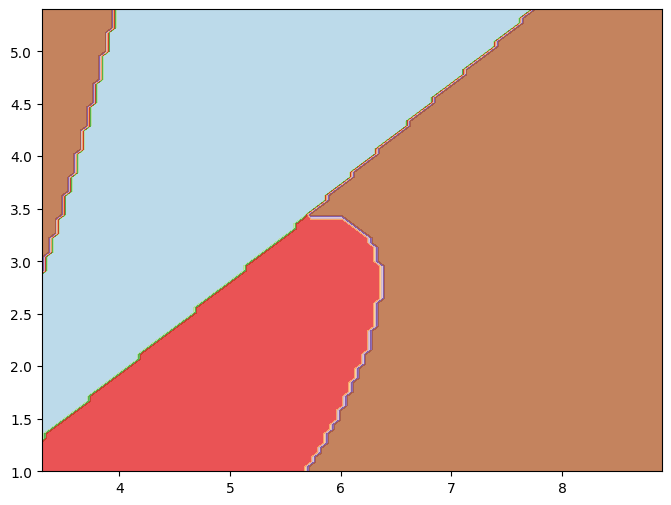

In [17]:
# Step 6: Plot Decision Boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.Paired)

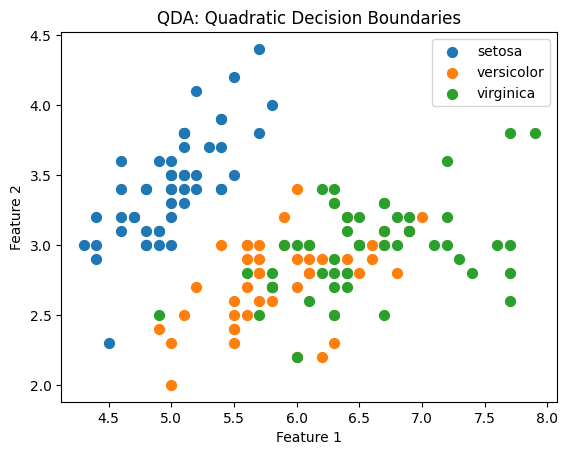

In [18]:
# Step 7: Plot Data Points
for cl, label in zip(np.unique(y), labels):
    plt.scatter(X[y == cl, 0], X[y == cl, 1], label=label, s=50)

plt.title('QDA: Quadratic Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Key Points**:

  **Data Preparation:**
        We use only the first two features for easier visualization.

  **QDA Model:**
        We use the QuadraticDiscriminantAnalysis class from sklearn to fit the QDA model.

  **Decision Boundaries:**
        The decision boundaries are generated by predicting the class labels across a mesh grid, then plotting the results.
        QDA allows for non-linear boundaries, which we can visualize as curves.

  **Plotting:**
        Decision Boundaries Plot: Visualizes how QDA separates the different classes. The regions correspond to different predicted classes, and the boundaries are quadratic (non-linear).
        Scatter Plot: The data points are overlaid on the decision boundary plot to show how well QDA has classified the points.




  **When to Use QDA:**

  **QDA is a better choice when:**
      The assumption of equal covariance in LDA is not true.
      You expect non-linear decision boundaries (when classes are not linearly separable).
      The classes have different variances or covariances.
  However, QDA might not perform as well when:
      The sample size is small and covariance estimates are not reliable.
      There is high noise or high-dimensional data.

      

**Conclusion:**

  QDA offers more flexibility compared to LDA, especially when classes have different variances or covariances.
  It's capable of handling more complex, non-linear decision boundaries, which makes it suitable for data that LDA cannot handle.
  For more complex tasks (such as facial recognition or large datasets), QDA may still face limitations, especially when the number of features is large or the data is high-dimensional.

Both LDA and QDA can be useful tools depending on the underlying assumptions about the data, but you should carefully evaluate your data and choose the method that aligns with your goals